In [2]:
#pd.read_csv(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(__file__)))) + os.sep + 'data' + os.sep + 'datos.csv')

In [69]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("homicides_data.csv")
df


,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,StateName,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
0,197603001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,NaN,...,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Other arguments,NaN,0,0,30180.0,"Anchorage, AK"
1,197604001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,NaN,...,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Girlfriend,Other arguments,NaN,0,0,30180.0,"Anchorage, AK"
2,197606001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,NaN,...,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Stranger,Other,NaN,0,0,30180.0,"Anchorage, AK"
3,197606002AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,NaN,...,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Other - known to victim,Other arguments,NaN,0,0,30180.0,"Anchorage, AK"
4,197607001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,NaN,...,American Indian or Alaskan Native,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,NaN,0,0,30180.0,"Anchorage, AK"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804746,201511001WYDI050,"Fremont, WY",WYDI050,Wyoming,Wind River Agency,Tribal,FBI,Yes,2015,NaN,...,American Indian or Alaskan Native,Not of Hispanic origin,"Handgun - pistol, revolver, etc",Common-law husband,Other - not specified,NaN,0,0,32316.0,Rural Wyoming
804747,201707001WYDI050,"Fremont, WY",WYDI050,Wyoming,Wind River Agency,Tribal,FBI,Yes,2017,NaN,...,American Indian or Alaskan Native,Not of Hispanic origin,Knife or cutting instrument,Friend,Brawl due to influence of alcohol,NaN,0,0,102418.0,Rural Wyoming
804748,201711001WYDI050,"Fremont, WY",WYDI050,Wyoming,Wind River Agency,Tribal,FBI,Yes,2017,NaN,...,American Indian or Alaskan Native,Not of Hispanic origin,"Blunt object - hammer, club, etc",Acquaintance,Brawl due to influence of alcohol,NaN,0,0,102418.0,Rural Wyoming
804749,201808001WYDI050,"Fremont, WY",WYDI050,Wyoming,Wind River Agency,Tribal,FBI,No,2018,NaN,...,Unknown,Unknown or not reported,Shotgun,Other - known to victim,Narcotic drug laws,NaN,0,0,93019.0,Rural Wyoming


In [5]:
df.columns

Index(['ID', 'CNTYFIPS', 'Ori', 'State', 'Agency', 'Agentype', 'Source',
       'Solved', 'Year', 'StateName', 'Month', 'Incident', 'ActionType',
       'Homicide', 'Situation', 'VicAge', 'VicSex', 'VicRace', 'VicEthnic',
       'OffAge', 'OffSex', 'OffRace', 'OffEthnic', 'Weapon', 'Relationship',
       'Circumstance', 'Subcircum', 'VicCount', 'OffCount', 'FileDate', 'MSA'],
      dtype='object')

In [6]:
df.StateName.value_counts()

Series([], Name: StateName, dtype: int64)

In [7]:
df.StateName.isnull().values.all()

True

In [8]:
df.Subcircum.isnull().values.all()

False

In [9]:
df.isnull().sum()

ID                   0
CNTYFIPS             0
Ori                  0
State                0
Agency               0
Agentype             0
Source               0
Solved               0
Year                 0
StateName       804751
Month                0
Incident             0
ActionType           0
Homicide             0
Situation            0
VicAge               0
VicSex               0
VicRace              0
VicEthnic            0
OffAge               0
OffSex               0
OffRace              0
OffEthnic            0
Weapon               0
Relationship         0
Circumstance         0
Subcircum       773249
VicCount             0
OffCount             0
FileDate          2510
MSA                  0
dtype: int64

In [10]:
df = df.drop(['StateName', 'Subcircum', 'FileDate'], axis =1)  

In [11]:
df.columns

Index(['ID', 'CNTYFIPS', 'Ori', 'State', 'Agency', 'Agentype', 'Source',
       'Solved', 'Year', 'Month', 'Incident', 'ActionType', 'Homicide',
       'Situation', 'VicAge', 'VicSex', 'VicRace', 'VicEthnic', 'OffAge',
       'OffSex', 'OffRace', 'OffEthnic', 'Weapon', 'Relationship',
       'Circumstance', 'VicCount', 'OffCount', 'MSA'],
      dtype='object')

In [12]:
#Understanding the dataset

In [13]:
df.CNTYFIPS.value_counts()

Los Angeles, CA    52628
New York, NY       45991
Cook, IL           29489
Wayne, MI          23249
Harris, TX         20719
                   ...  
Webster, NE            1
Garfield, NE           1
Greeley, KS            1
Gregory, SD            1
Pawnee, KS             1
Name: CNTYFIPS, Length: 3065, dtype: int64

In [14]:
df.Ori.value_counts()

NY03030    45974
ILCPD00    27873
CA01942    27744
MI82349    20938
TXHPD00    16394
           ...  
OH05016        1
NJ01224        1
ME00207        1
KS01601        1
NY203UN        1
Name: Ori, Length: 12936, dtype: int64

In [15]:
df.Agency.value_counts()

New York              45974
Chicago               27873
Los Angeles           27744
Detroit               20938
Houston               16394
                      ...  
Coolbaugh Township        1
Pequea Township           1
Duxbury                   1
Estancia                  1
Eastfield College         1
Name: Agency, Length: 9606, dtype: int64

In [16]:
df.Source.value_counts()

FBI    774156
MAP     30595
Name: Source, dtype: int64

In [17]:
df.Incident.value_counts()

1      331409
2       90847
3       49320
4       33961
5       25708
        ...  
862        28
861        28
716        28
859        28
635        28
Name: Incident, Length: 1000, dtype: int64

In [18]:
df.ActionType.value_counts()

Normal update    654033
Adjustment       150718
Name: ActionType, dtype: int64

In [19]:
df.Solved.value_counts()

Yes    568059
No     236692
Name: Solved, dtype: int64

In [20]:
df.Homicide.value_counts()

Murder and non-negligent manslaughter    791883
Manslaughter by negligence                12868
Name: Homicide, dtype: int64

In [21]:
df.Situation.value_counts()

Single victim/single offender           441743
Single victim/unknown offender(s)       213712
Single victim/multiple offenders         82068
Multiple victims/single offender         37796
Multiple victims/unknown offender(s)     18057
Multiple victims/multiple offenders      11375
Name: Situation, dtype: int64

In [22]:
df.Weapon.value_counts()

Handgun - pistol, revolver, etc         394363
Knife or cutting instrument             117868
Firearm, type not stated                 68428
Personal weapons, includes beating       46269
Other or type unknown                    41648
Shotgun                                  39071
Blunt object - hammer, club, etc         35638
Rifle                                    30109
Strangulation - hanging                  10038
Fire                                      7769
Asphyxiation - includes death by gas      4954
Other gun                                 3102
Narcotics or drugs, sleeping pills        2538
Drowning                                  1503
Explosives                                 625
Poison - does not include gas              569
Pushed or thrown out window                259
Name: Weapon, dtype: int64

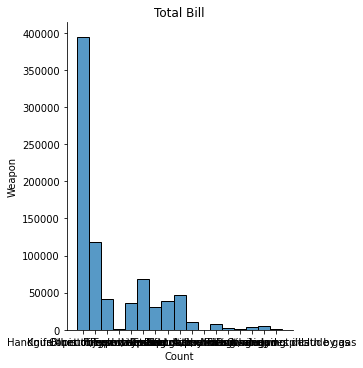

In [23]:
total = sns.displot(df.Weapon)
total.set(ylabel = "Weapon", xlabel = 'Count', title = "Total Bill")
sns.despine()

<AxesSubplot:ylabel='Weapon'>

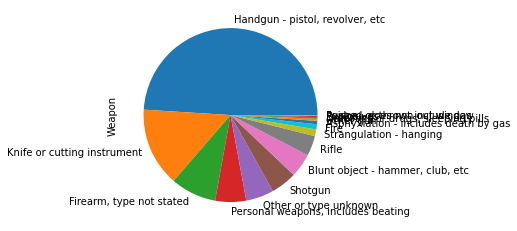

In [24]:
df.Weapon.value_counts().plot.pie()

In [25]:
df.Relationship.value_counts()

Relationship not determined    308480
Acquaintance                   156780
Stranger                       119380
Other - known to victim         36699
Wife                            29615
Friend                          27713
Girlfriend                      20532
Son                             12609
Other family                    12189
Husband                         12126
Boyfriend                        9369
Daughter                         9226
Neighbor                         8255
Brother                          7023
Father                           5815
Mother                           5601
In-law                           4889
Common-law wife                  3314
Common-law husband               2712
Ex-wife                          2472
Stepfather                       1817
Sister                           1715
Homosexual relationship          1710
Stepson                          1539
Stepdaughter                      898
Ex-husband                        898
Employer    

In [26]:
df.Circumstance.value_counts()

Circumstances undetermined              212692
Other arguments                         208510
Other                                   103865
Robbery                                  60819
Narcotic drug laws                       30073
Other - not specified                    27736
Juvenile gang killings                   24647
Felon killed by police                   17722
Brawl due to influence of alcohol        16243
Argument over money or property          15727
Felon killed by private citizen          13813
All suspected felony type                13623
Lovers triangle                          12367
Burglary                                  6552
All other manslaughter by negligence      6310
Gangland killings                         5443
Brawl due to influence of narcotics       5174
Arson                                     4768
Rape                                      4214
Other negligent handling of gun           3987
Children playing with gun                 1466
Other sex off

<AxesSubplot:ylabel='Circumstance'>

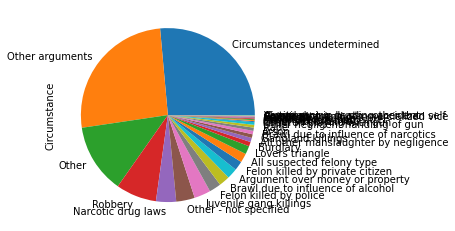

In [27]:
df.Circumstance.value_counts().plot.pie()

In [28]:
df.OffRace.value_counts()

White                                  275493
Black                                  272771
Unknown                                244548
Asian                                    7081
American Indian or Alaskan Native        4776
Native Hawaiian or Pacific Islander        82
Name: OffRace, dtype: int64

In [29]:
df.duplicated().sum()

2233

In [30]:
df = df.drop_duplicates()


In [31]:
df = df[df.ActionType != "Adjustment"]


In [32]:
df.drop("ActionType", axis=1, inplace = True)

In [33]:
df.columns

Index(['ID', 'CNTYFIPS', 'Ori', 'State', 'Agency', 'Agentype', 'Source',
       'Solved', 'Year', 'Month', 'Incident', 'Homicide', 'Situation',
       'VicAge', 'VicSex', 'VicRace', 'VicEthnic', 'OffAge', 'OffSex',
       'OffRace', 'OffEthnic', 'Weapon', 'Relationship', 'Circumstance',
       'VicCount', 'OffCount', 'MSA'],
      dtype='object')

In [34]:
df.reset_index(inplace = True)

In [35]:
#Taking the relevant data for the study 

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652450 entries, 0 to 652449
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   index         652450 non-null  int64 
 1   ID            652450 non-null  object
 2   CNTYFIPS      652450 non-null  object
 3   Ori           652450 non-null  object
 4   State         652450 non-null  object
 5   Agency        652450 non-null  object
 6   Agentype      652450 non-null  object
 7   Source        652450 non-null  object
 8   Solved        652450 non-null  object
 9   Year          652450 non-null  int64 
 10  Month         652450 non-null  object
 11  Incident      652450 non-null  int64 
 12  Homicide      652450 non-null  object
 13  Situation     652450 non-null  object
 14  VicAge        652450 non-null  int64 
 15  VicSex        652450 non-null  object
 16  VicRace       652450 non-null  object
 17  VicEthnic     652450 non-null  object
 18  OffAge        652450 non

In [37]:
df_clean = df[['State','Solved', 'Year']]
df_clean

,State,Solved,Year
0,Alaska,Yes,1976
1,Alaska,Yes,1976
2,Alaska,Yes,1976
3,Alaska,Yes,1976
4,Alaska,Yes,1976
...,...,...,...
652445,Wyoming,Yes,2015
652446,Wyoming,Yes,2017
652447,Wyoming,Yes,2017
652448,Wyoming,No,2018


In [38]:
def clean_1():
    df = pd.read_csv("homicides_data.csv")
    df = df.drop(['StateName', 'Subcircum', 'FileDate'], axis =1)
    df = df.drop_duplicates()
    df = df[df.ActionType != "Adjustment"]
    df.drop("ActionType", axis=1, inplace = True)
    df.reset_index(inplace = True)
    df_clean = df[['State','Solved', 'Year']]
    return

In [39]:
def create_decade():
    df_clean['Decade'] = df_clean['Year']
    df_clean['Decade'] = df_clean['Decade'].apply(lambda x: str(x))
    df_clean['Decade'] = df_clean['Decade'].str[:3]
    df_clean['Zeros'] = '0'
    df_clean['Decade'] = df_clean['Decade'] + df_clean['Zeros']
    df_clean.drop('Zeros', axis= 1, inplace=True)
    df_clean.drop('Year', axis= 1, inplace=True)
    return df_clean
create_decade()

ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:5: SettingWithCopyWarning: 
A value is trying to be

,State,Solved,Decade
0,Alaska,Yes,1970
1,Alaska,Yes,1970
2,Alaska,Yes,1970
3,Alaska,Yes,1970
4,Alaska,Yes,1970
...,...,...,...
652445,Wyoming,Yes,2010
652446,Wyoming,Yes,2010
652447,Wyoming,Yes,2010
652448,Wyoming,No,2010


In [40]:
def enc_solved():
    df_clean['Enc_Solved'] = df['Solved']
    coding = df_clean['Enc_Solved']
    df_clean[['Enc_NoSolved', 'Enc_Solved']] = pd.get_dummies(coding)
    return df_clean
def sum_solved():
    return df_clean.groupby(['Decade', 'State']).sum()
enc_solved()

ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\marin\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,State,Solved,Decade,Enc_Solved,Enc_NoSolved
0,Alaska,Yes,1970,1,0
1,Alaska,Yes,1970,1,0
2,Alaska,Yes,1970,1,0
3,Alaska,Yes,1970,1,0
4,Alaska,Yes,1970,1,0
...,...,...,...,...,...
652445,Wyoming,Yes,2010,1,0
652446,Wyoming,Yes,2010,1,0
652447,Wyoming,Yes,2010,1,0
652448,Wyoming,No,2010,0,1


In [73]:
def clean_population():
    population = pd.read_csv('population.csv', sep=";")
    population.rename(columns={'Unnamed: 0':'Area'},inplace=True)
    population.set_index('Area', inplace = True)
    population.drop(population.filter(regex='Rank').columns, axis=1, inplace = True)
    population.drop(population.filter(regex='2020').columns, axis=1, inplace = True)
    
    population = population.T
    
    population = population.iloc[::-1]
    population['Decade'] = [1970,1970,1980,1980,1990,1990,2000,2000,2010,2010]
    col_name="Decade"
    first_col = population.pop("Decade")
    population.insert(0, col_name, first_col)
    population.reset_index(level= None, inplace=True)
    
    population.set_index('Decade', inplace = True)
    
    population.rename(columns = {'index': 'Medidas'}, inplace=True)
    population['Medidas'] = population['Medidas'].str[:-12]
    population.reset_index(level='Decade', inplace=True)
    population.reset_index(inplace= True)
    return population
population = clean_population()
'''
def agrupar_population():
    return population.groupby(['Decade','Medidas']).sum()
population2 = agrupar_population()
'''

"\ndef agrupar_population():\n    return population.groupby(['Decade','Medidas']).sum()\npopulation2 = agrupar_population()\n"

In [74]:
population

Area,index,Decade,Medidas,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,United States1
0,0,1970,Population Density,"68,0","0,5","15,6","37,0","128,1","21,3","626,1",...,"95,2","42,9","12,9","48,2","117,7","51,3","72,6","81,6","3,4","57,5"
1,1,1970,Resident Population,3.444.165,300.382,1.770.900,1.923.295,19.953.134,2.207.259,3.031.709,...,3.923.687,11.196.730,1.059.273,444.330,4.648.494,3.409.169,1.744.237,4.417.731,332.416,203.211.926
2,2,1980,Population Density,"76,9","0,7","23,9","43,9","151,9","27,9","641,7",...,"111,3","54,5","17,8","55,5","135,4","62,2","81,1","86,9","4,8","64,1"
3,3,1980,Resident Population,3.893.888,401.851,2.718.215,2.286.435,23.667.902,2.889.964,3.107.576,...,4.591.120,14.229.191,1.461.037,511.456,5.346.818,4.132.156,1.949.644,4.705.767,469.557,226.545.805
4,4,1990,Population Density,"79,8","1,0","32,3","45,2","191,0","31,8","678,8",...,"118,3","65,0","21,0","61,1","156,7","73,2","74,6","90,3","4,7","70,4"
5,5,1990,Resident Population,4.040.587,550.043,3.665.228,2.350.725,29.760.021,3.294.394,3.287.116,...,4.877.185,16.986.510,1.722.850,562.758,6.187.358,4.866.692,1.793.477,4.891.769,453.588,248.709.873
6,6,2000,Population Density,"87,8","1,1","45,2","51,4","217,4","41,5","703,3",...,"138,0","79,8","27,2","66,1","179,2","88,7","75,2","99,0","5,1","79,7"
7,7,2000,Resident Population,4.447.100,626.932,5.130.632,2.673.400,33.871.648,4.301.261,3.405.565,...,5.689.283,20.851.820,2.233.169,608.827,7.078.515,5.894.121,1.808.344,5.363.675,493.782,281.421.906
8,8,2010,Population Density,"94,4","1,2","56,3","56,0","239,1","48,5","738,1",...,"153,9","96,3","33,6","67,9","202,6","101,2","77,1","105,0","5,8","87,4"
9,9,2010,Resident Population,4.779.736,710.231,6.392.017,2.915.918,37.253.956,5.029.196,3.574.097,...,6.346.105,25.145.561,2.763.885,625.741,8.001.024,6.724.540,1.852.994,5.686.986,563.626,308.745.538


In [562]:
df_clean.loc('Rhodes Island', : inplace = True)

C:\Users\marin\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [651]:
df_clean.to_csv('dataframe1.csv',index =False)

In [621]:
#population = population.groupby(['Decade', 'Medidas']).sum().reset_index('Medidas').stack()

#.reset_index('Decade', inplace = True)
population.reset_index(inplace = True)


In [627]:
population.drop('Area', inplace = True)



KeyError: "['Area'] not found in axis"

In [81]:
population.to_csv('dataframe2.csv', index=False)

In [ ]:
populati